## KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


・SimpleRNN

・GRU

・LSTM

・ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)


ConvLSTM2Dのサンプルコード


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [66]:
import numpy as np
import pandas as pd
from tensorflow.keras import backend as K

In [67]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### SimpleRNN

In [4]:
from keras.layers.recurrent import SimpleRNN
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# 変更
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/2
782/782 [==============================] - 96s 123ms/step - loss: 0.6670 - accuracy: 0.5716 - val_loss: 0.5649 - val_accuracy: 0.6975
Epoch 2/2
782/782 [==============================] - 6s 8ms/step - loss: 0.6462 - accuracy: 0.6075
Test score: 0.6462468504905701
Test accuracy: 0.607479989528656


### GRU

In [6]:
from keras.layers.recurrent import GRU
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
max_features = 20000

# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, 128))
#変更
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/2
782/782 [==============================] - 240s 306ms/step - loss: 0.4378 - accuracy: 0.7906 - val_loss: 0.3615 - val_accuracy: 0.8428
Epoch 2/2
782/782 [==============================] - 16s 21ms/step - loss: 0.3602 - accuracy: 0.8462
Test score: 0.36022183299064636
Test accuracy: 0.8461999893188477


### LSTM

In [7]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000

# この単語数の後にテキストを切り取ります（上位のmax_featuresの最も一般的な単語の中で）
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# さまざまなオプティマイザーとさまざまなオプティマイザー構成を使用してみてください
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/2
782/782 [==============================] - 269s 344ms/step - loss: 0.4393 - accuracy: 0.7914 - val_loss: 0.3592 - val_accuracy: 0.8394
Epoch 2/2
782/782 [==============================] - 18s 23ms/step - loss: 0.3758 - accuracy: 0.8390
Test score: 0.3757888674736023
Test accuracy: 0.8389599919319153


### 比較

In [8]:
list1=[[0.64,0.60], [0.36,0.84], [0.37,0.83]]
index1 = ["SimpleRNN", "GRU", "LSTM"]
columns1 =["Test score", "Test accuracy"]
pd.DataFrame(data=list1, index=index1, columns=columns1)

,Test score,Test accuracy
SimpleRNN,0.64,0.60
GRU,0.36,0.84
LSTM,0.37,0.83


### ConvLSTM2D

Epoch 1/2
95/95 [==============================] - 48s 509ms/step - loss: 0.8053 - val_loss: 0.7458
Epoch 2/2
95/95 [==============================] - 47s 493ms/step - loss: 0.7579 - val_loss: 0.8253


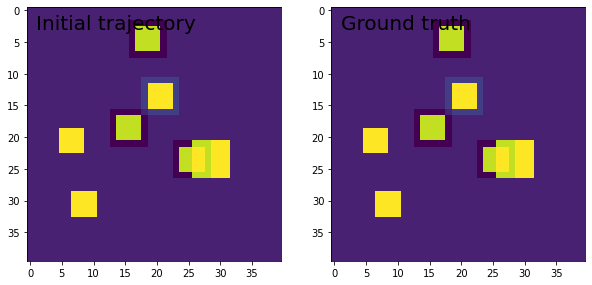

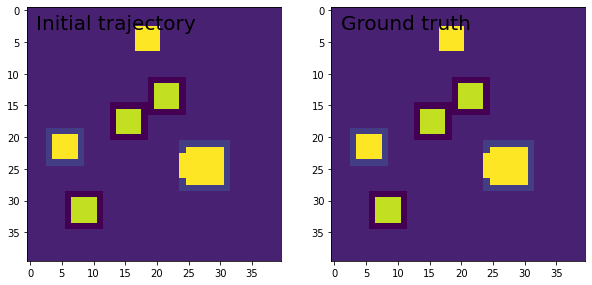

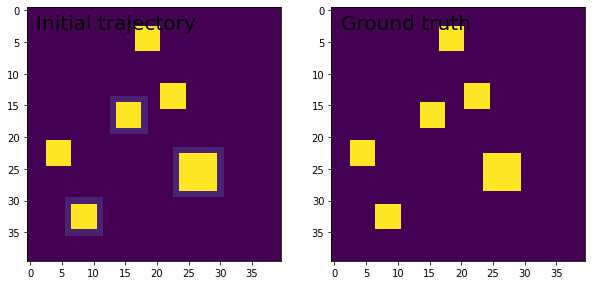

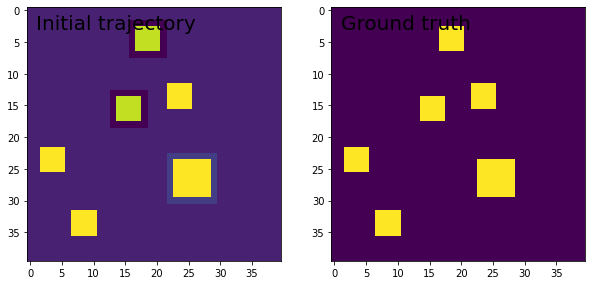

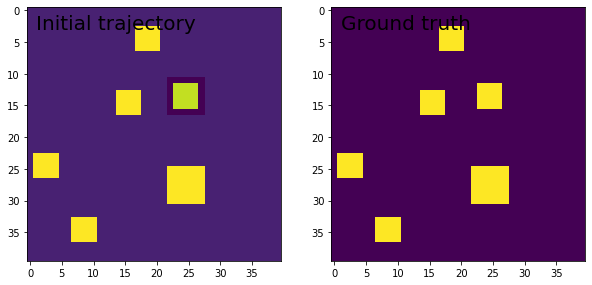

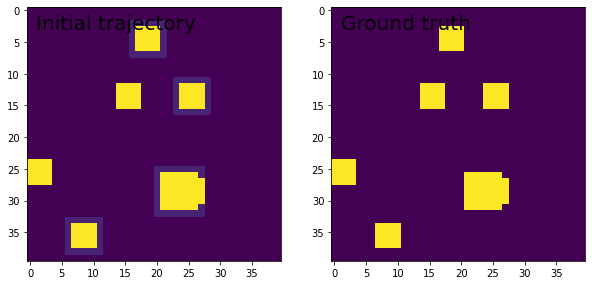

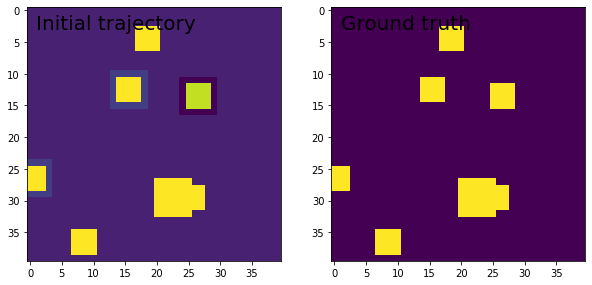

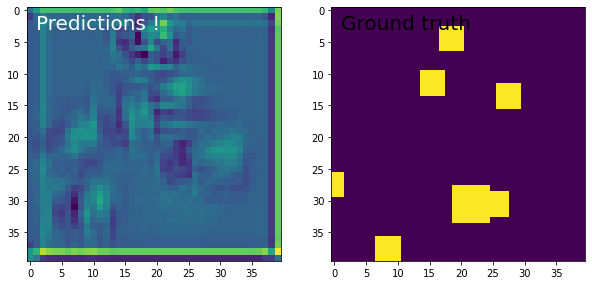

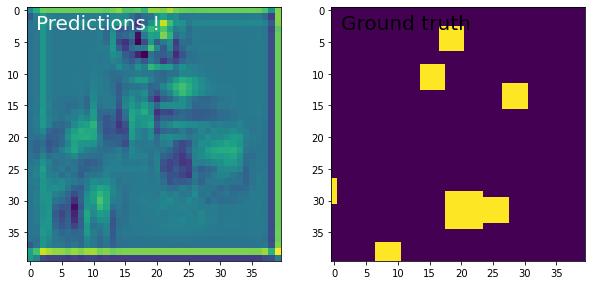

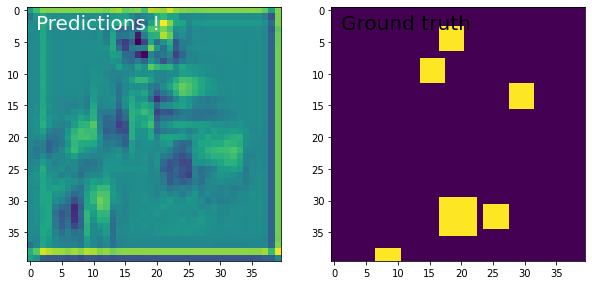

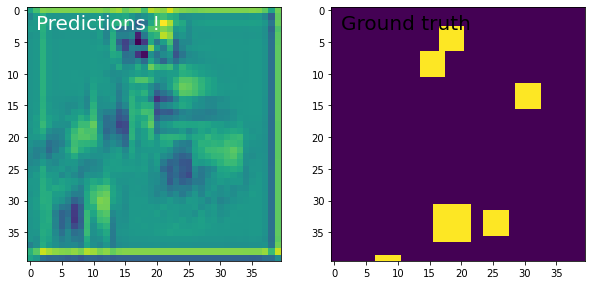

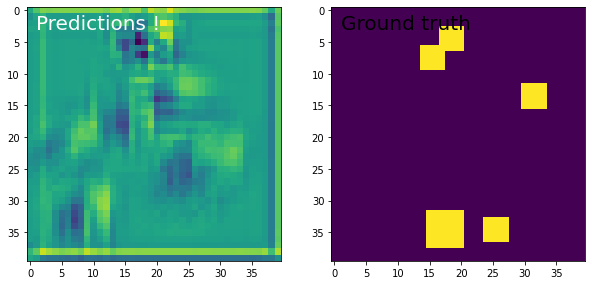

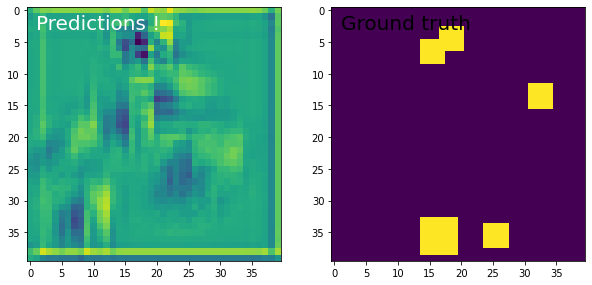

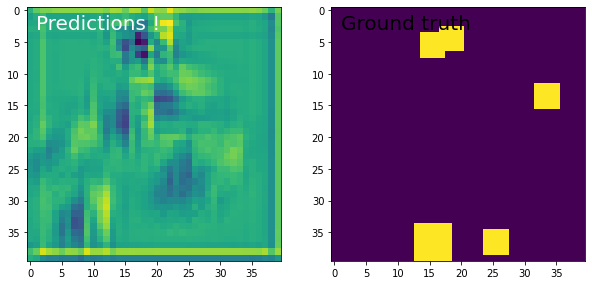

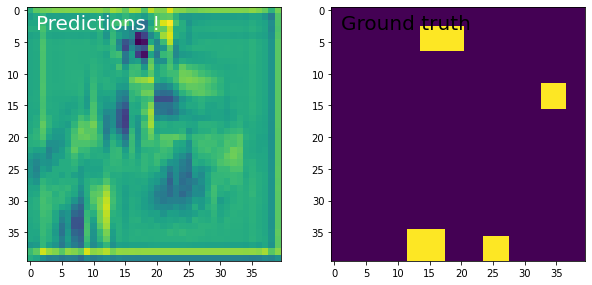

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# 形状の入力ムービーとして使用するレイヤーを作成します
# (n_frames, width, height, channels) そしてムービーを返します同一形状の

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# 人工データの生成:
# 3〜7個の移動する正方形が内部にあるムービーを生成します
# 正方形は1x1または2x2ピクセルの形状で、
# 時間とともに直線的に移動します
# 便宜上、最初に幅と高さを大きくしたムービーを作成します（80x80）
# そして最後に40x40ウィンドウを選択します。

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # 3〜7個の移動する正方形を追加します
        n = np.random.randint(3, 8)

        for j in range(n):
            # 初期位置
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # 動きの方向
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # 正方形のサイズ
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # ノイズを追加して、より堅牢にします
                # アイデアは、推論中に、
                # ピクセルの値は正確に1つではありません。
                # ネットワークを堅牢でありながらトレーニングする必要があります
                # 正方形に属するピクセルと見なします。
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

# 1つの映画でネットワークをテストする
# 最初の7つの位置でフィードしてから
# 新しい位置を予測する
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。



ロイターのニュースワイヤー トピックス分類

## SimpleRNN

In [71]:
word_index = reuters.get_word_index(path="reuters_word_index.npz")

In [96]:
from keras.datasets import reuters
from keras.layers.recurrent import SimpleRNN
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

max_features = 20000
maxlen = 80
batch_size = 32

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train.shape)
print(y_test.shape)




print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', #adamから変更
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
(8982, 46)
(2246, 46)
Build model...
71/71 [==============================] - 1s 7ms/step - loss: 2.1553 - accuracy: 0.4849
Test score: 2.1552858352661133
Test accuracy: 0.48486196994781494


## GRU

In [97]:
from keras.datasets import reuters
from keras.layers.recurrent import GRU
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

max_features = 20000
maxlen = 80
batch_size = 32

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train.shape)
print(y_test.shape)




print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax')) # 変更

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', #adamから変更
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
(8982, 46)
(2246, 46)
Build model...
71/71 [==============================] - 1s 20ms/step - loss: 1.7902 - accuracy: 0.5387
Test score: 1.7902336120605469
Test accuracy: 0.5387355089187622


## LSTM

In [98]:
from keras.datasets import reuters
from keras.layers import LSTM
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.datasets import imdb
from keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

max_features = 20000
maxlen = 80
batch_size = 32

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train.shape)
print(y_test.shape)




print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', #adamから変更
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
(8982, 46)
(2246, 46)
Build model...
71/71 [==============================] - 2s 21ms/step - loss: 1.7705 - accuracy: 0.5080
Test score: 1.7705252170562744
Test accuracy: 0.5080142617225647


In [99]:
list1=[[2.15,0.48], [1.79,0.53], [1.77, 0.50]]
index1 = ["SimpleRNN", "GRU", "LSTM"]
columns1 =["Test score", "Test accuracy"]
pd.DataFrame(data=list1, index=index1, columns=columns1)

,Test score,Test accuracy
SimpleRNN,2.15,0.48
GRU,1.79,0.53
LSTM,1.77,0.50


## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


・RNN

・SimpleRNNCell

・GRUCell

・LSTMCell

・StackedRNNCells

・CuDNNGRU

・CuDNNLSTM

## 回答


・RNN : Recurrentレイヤーに対する基底クラス、cellレイヤーを受け取る

・SimpleRNNCell : SimpleRNNのCellクラス、RNNにcellとして渡す


・GRUCell : ゲートのあるリカレントユニット、GRUのCellクラス
RNNにcellとして渡す

・LSTMCell : LSTMのCellクラス
RNNにcellとして渡す

・StackedRNNCells : RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー

・CuDNNGRU : CuDNNを利用した高速なGRU実装、GPU上のみで動作

・CuDNNLSTM : CuDNNを利用した高速なLSTM実装、GPU上のみで動作